# House Pricing Predictive Model Labwork using Linear Regression (Together with implementing regularization and hyperparameters tuning)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary packages for data analysis and visualization (numpy & pandas)

import numpy as np
import pandas as pd

# Import packages for data visualisation

import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#Reading the dataset
housing = pd.DataFrame(pd.read_csv("House Pricing.csv"))

In [3]:
# Display first five rows of dataset
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Shows the rows and columns of dataset in the format (rows,column)
housing.shape

(545, 13)

In [6]:
# Various statistics such as count, mean, standard deviation, minimum, maximum, and percentiles for each numerical column of the dataset
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# If output = 0.0, no missing value present in particular column
# If output > 0.0, missing values are present in the particular column

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

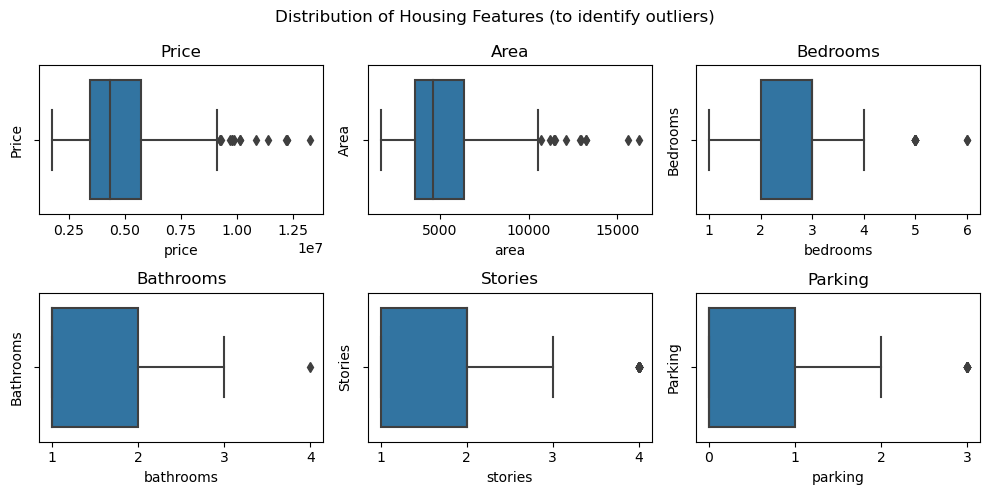

In [8]:
# Visualisation of distribution of housing features (columns) and to identify potential outliers
# Outliers can be identified as individual points outside the whiskers of the boxplots.
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

sns.boxplot(x=housing['price'], ax=axs[0, 0])
axs[0, 0].set_title('Price')
axs[0, 0].set_ylabel('Price')

sns.boxplot(x=housing['area'], ax=axs[0, 1])
axs[0, 1].set_title('Area')
axs[0, 1].set_ylabel('Area')

sns.boxplot(x=housing['bedrooms'], ax=axs[0, 2])
axs[0, 2].set_title('Bedrooms')
axs[0, 2].set_ylabel('Bedrooms')

sns.boxplot(x=housing['bathrooms'], ax=axs[1, 0])
axs[1, 0].set_title('Bathrooms')
axs[1, 0].set_ylabel('Bathrooms')

sns.boxplot(x=housing['stories'], ax=axs[1, 1])
axs[1, 1].set_title('Stories')
axs[1, 1].set_ylabel('Stories')

sns.boxplot(x=housing['parking'], ax=axs[1, 2])
axs[1, 2].set_title('Parking')
axs[1, 2].set_ylabel('Parking')

fig.suptitle('Distribution of Housing Features (to identify outliers)')

plt.tight_layout()


In [9]:
# Proceed to treating outliers
# After analyzing the data, it was found that the columns "Price" and "Area" have a significant number of outliers (many individual points outside the boxplot's whiskers)
# As we have a sufficient amount of data, it is possible to drop these outliers  (extreme values) to improve the accuracy of our analysis.

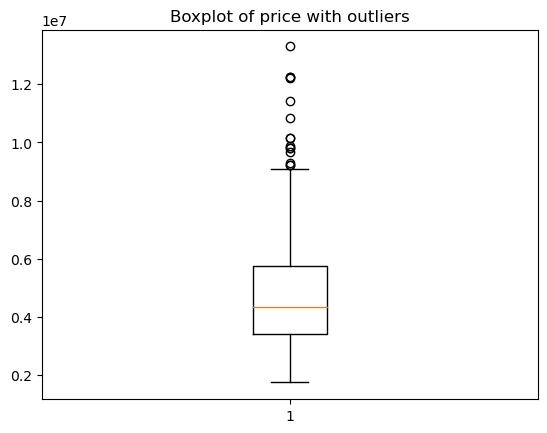

In [10]:
# Boxplot(price) with outliers
plt.title("Boxplot of price with outliers")
plt.boxplot(housing.price)
plt.show()

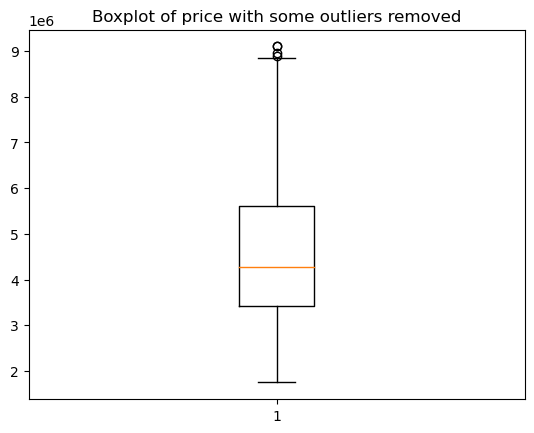

In [11]:

# Calculate IQR and bounds for price
q1_price = housing.price.quantile(0.25)
q3_price = housing.price.quantile(0.75)
iqr_price = q3_price - q1_price
upper_bound_price = q3_price + 1.5 * iqr_price
lower_bound_price = q1_price - 1.5 * iqr_price
# Removing outliers/extreme values (lie beyond the whiskers of the boxplot) for price
housing = housing[(housing.price >= lower_bound_price) & (housing.price <= upper_bound_price)]
plt.boxplot(housing.price)
plt.title("Boxplot of price with some outliers removed")
plt.show()

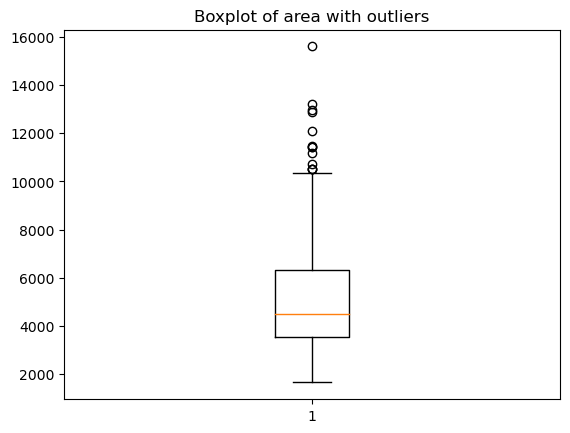

In [12]:
# Boxplot(area) with outliers
plt.title("Boxplot of area with outliers")
plt.boxplot(housing.area)
plt.show()

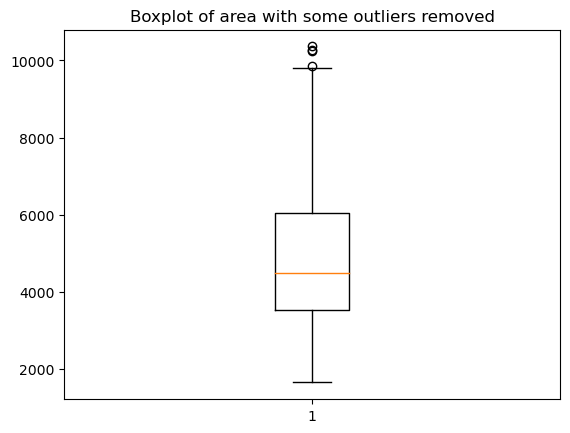

In [13]:
# Calculate IQR and bounds for area
q1_area = housing.area.quantile(0.25)
q3_area = housing.area.quantile(0.75)
iqr_area = q3_area - q1_area
upper_bound_area = q3_area + 1.5 * iqr_area
lower_bound_area = q1_area - 1.5 * iqr_area
# Removing outliers/extreme values (lie beyond the whiskers of the boxplot) for area
housing = housing[(housing.area >= lower_bound_area) & (housing.area <= upper_bound_area)]
plt.title("Boxplot of area with some outliers removed")
plt.boxplot(housing.area)
plt.show()

In [14]:
housing = housing.reset_index(drop=True)

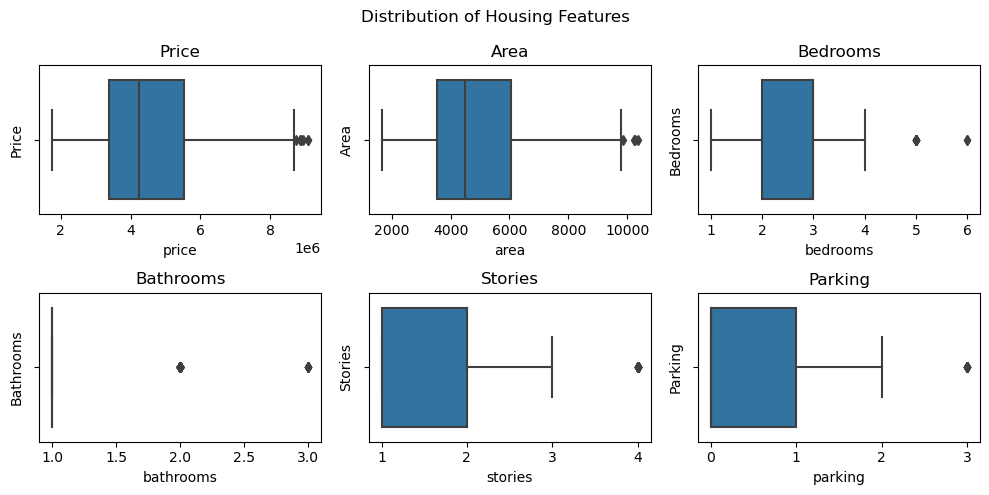

In [15]:
# Create a 2x3 grid of plots
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

sns.boxplot(x=housing['price'], ax=axs[0, 0])
axs[0, 0].set_title('Price') 
axs[0, 0].set_ylabel('Price')  

sns.boxplot(x=housing['area'], ax=axs[0, 1])
axs[0, 1].set_title('Area')
axs[0, 1].set_ylabel('Area')

sns.boxplot(x=housing['bedrooms'], ax=axs[0, 2])
axs[0, 2].set_title('Bedrooms')
axs[0, 2].set_ylabel('Bedrooms')

sns.boxplot(x=housing['bathrooms'], ax=axs[1, 0])
axs[1, 0].set_title('Bathrooms')
axs[1, 0].set_ylabel('Bathrooms')

sns.boxplot(x=housing['stories'], ax=axs[1, 1])
axs[1, 1].set_title('Stories')
axs[1, 1].set_ylabel('Stories')

sns.boxplot(x=housing['parking'], ax=axs[1, 2])
axs[1, 2].set_title('Parking')
axs[1, 2].set_ylabel('Parking')


fig.suptitle('Distribution of Housing Features')


plt.tight_layout()

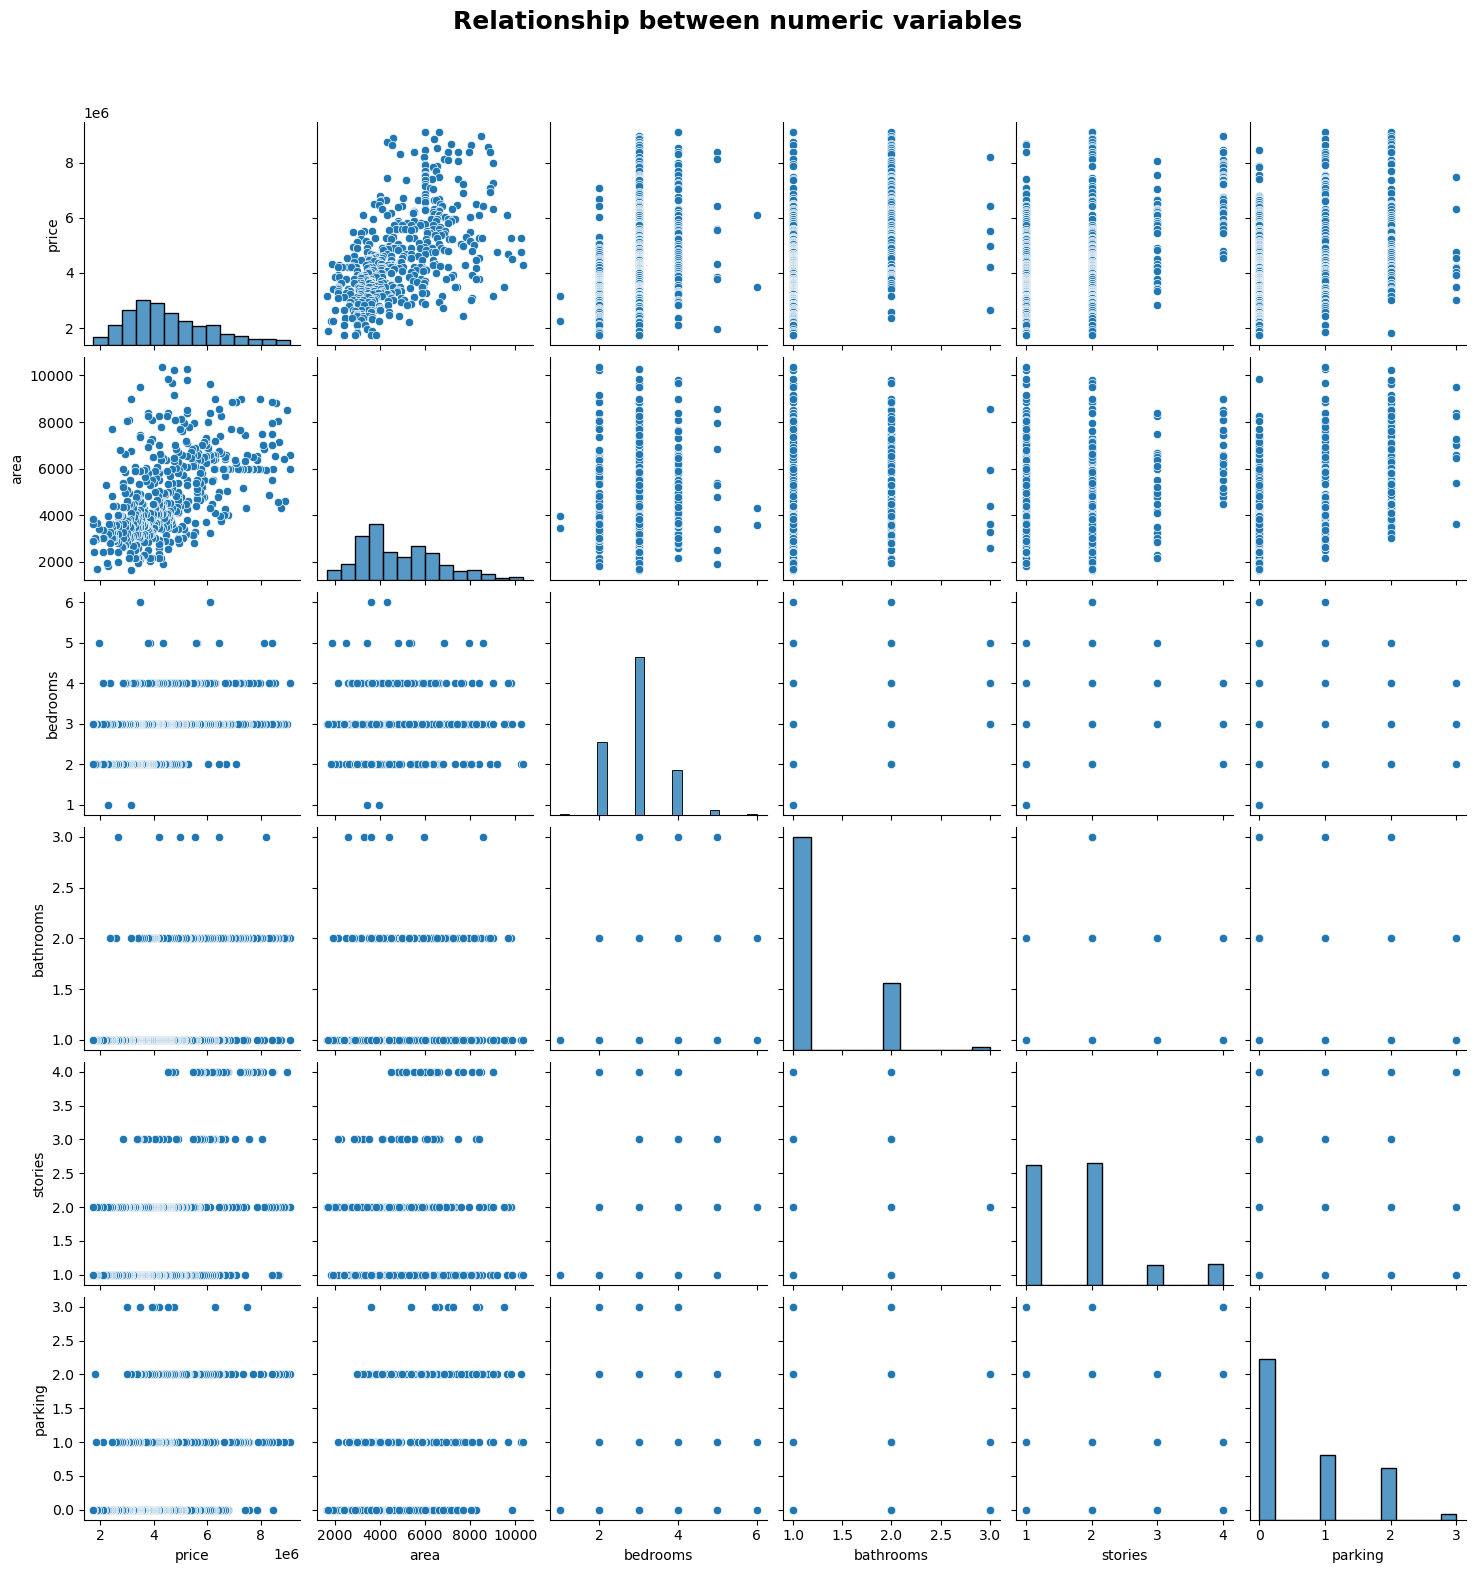

In [16]:
# Pairplot visualization to show relationship between numeric variables in dataset
sns.pairplot(housing, height=2.5)
plt.suptitle("Relationship between numeric variables", y=1.05, fontweight= 'bold', fontsize= 18)
plt.show()

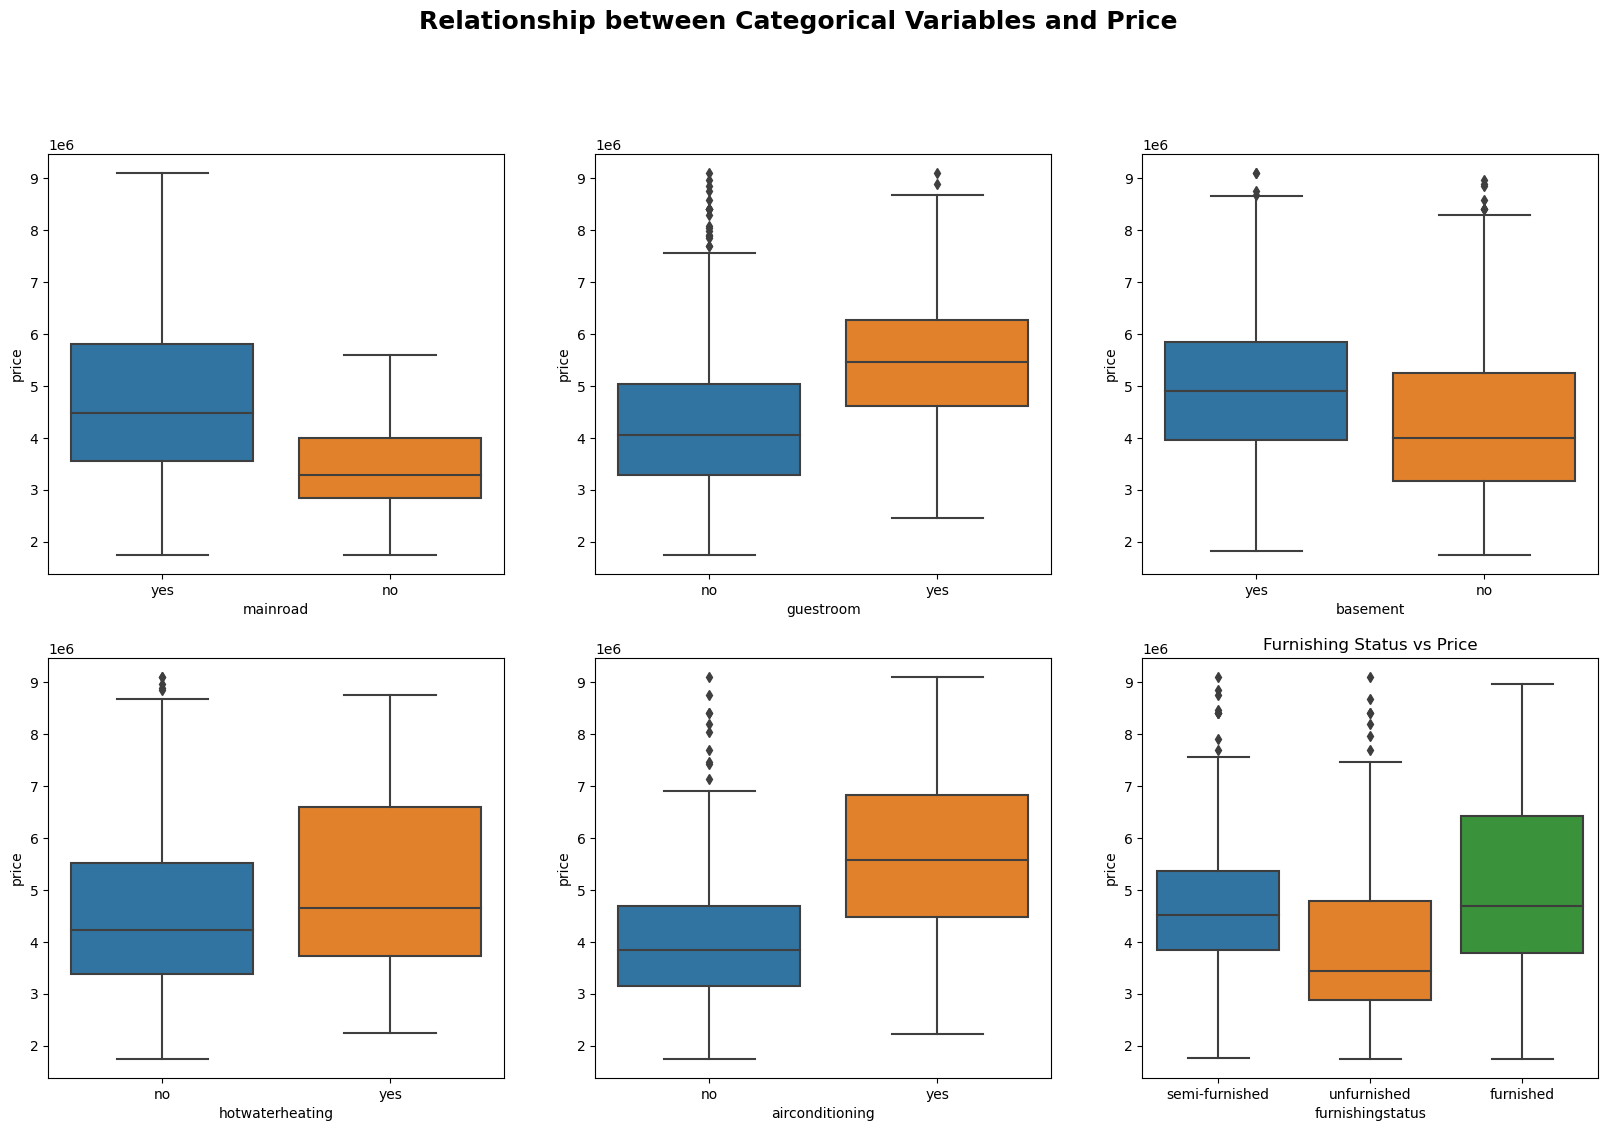

In [17]:
# Boxplot to show relationship between categorical data and price
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.title('Furnishing Status vs Price')
plt.suptitle("Relationship between Categorical Variables and Price", y=1.0, fontweight='bold', fontsize=18)
plt.show()

In [18]:
# There are 6 columns of variables in the dataset with values as 'Yes' or 'No'
# Have to convert them to 1s and 0s because numerical values is needed
# 1 - Yes ; 0 - No
# Here is another view on snippets of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
1,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
2,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
3,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
4,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [19]:
# Counting how many Yes and No are in each of these 6 columns of variables with string values.
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in yes_no_cols:
    print(f"{col}:")
    print(housing[col].value_counts())
    print("")

mainroad:
yes    440
no      77
Name: mainroad, dtype: int64

guestroom:
no     425
yes     92
Name: guestroom, dtype: int64

basement:
no     338
yes    179
Name: basement, dtype: int64

hotwaterheating:
no     495
yes     22
Name: hotwaterheating, dtype: int64

airconditioning:
no     358
yes    159
Name: airconditioning, dtype: int64

prefarea:
no     405
yes    112
Name: prefarea, dtype: int64



In [20]:
# 6 columns of variables with 'Yes' or 'No' values

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, "no": 0}))

In [21]:
# Display modified dataset
housing.head()
# In this modified dataset, the 'Yes' has been changed with 1 and the 'No' has been changed to 0

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [22]:
# Convert categorical variables into numerical variables
furnishing_status = pd.get_dummies(housing['furnishingstatus'])

In [23]:
# Display dataset of furnishing status
furnishing_status.head(10)

,furnished,semi-furnished,unfurnished
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,0,0,1
7,1,0,0
8,1,0,0
9,1,0,0


In [24]:
# Add the results to the original housing dataset
housing = pd.concat([housing, furnishing_status ], axis = 1)

In [25]:
# Display dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,0,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,1,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,1,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,0,1,0


In [26]:
# Drop 'furnishingstatus' column as we already have the converted numerical variables of the furnishing status

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [27]:
# Display latest dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,0,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1,0


In [28]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
# Using 80:20 split (70% for training and 30% for testing)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# Scaling the numeric variables
numericVars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[numericVars] = scaler.fit_transform(df_train[numericVars])

In [31]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
124,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,0,1,0
209,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,0,1,0
329,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,1,0,0
397,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,1,0,0
488,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,0,1


In [32]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,0.218837,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.414031,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


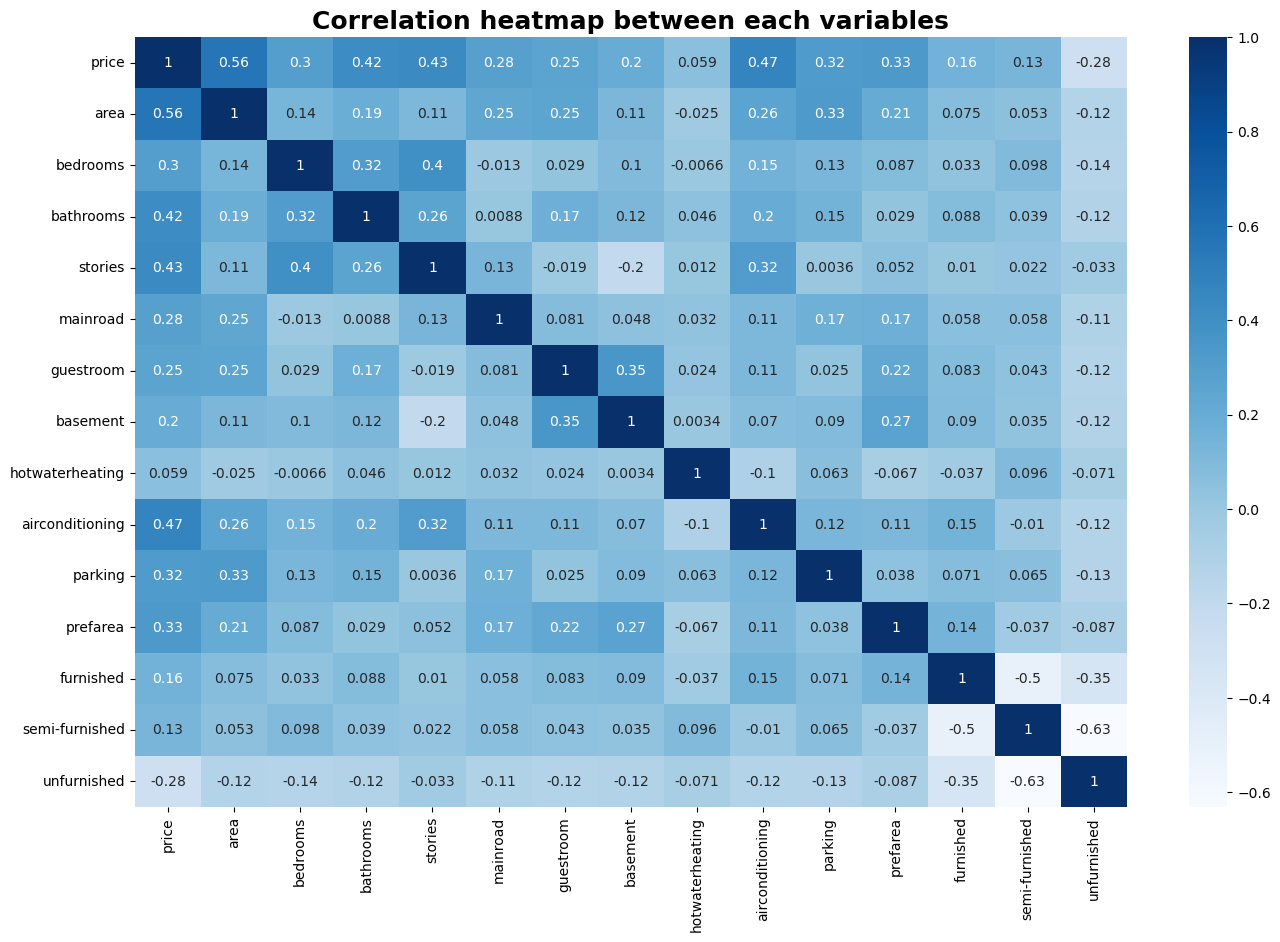

In [33]:
# Heatmap from Seaborn library used to show the correlation between each variables
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap="Blues")
plt.title("Correlation heatmap between each variables" , fontsize = 18 , fontweight= 'bold')
plt.show()

In [34]:
# As we can see in this heatmap, the darker the colour of the cell, the higher the value of correlation coefficient between the two variables
# In other words, darker colour cell ---> the two variables are highly correlated
# In this heatmap, the 1s are not counted, so the variables with highest correlation coefficient are Price and Area (0.56)

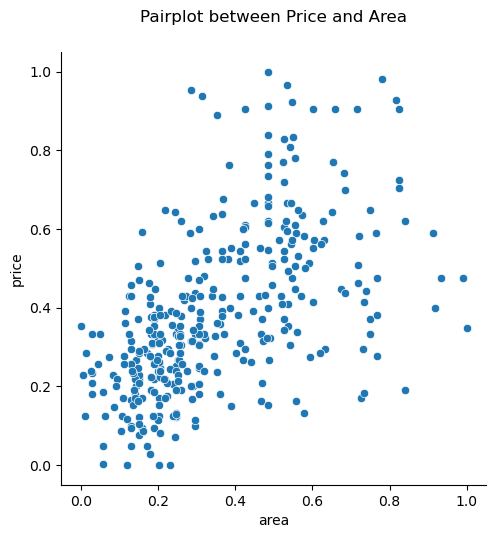

In [35]:
sns.pairplot(df_train, x_vars=['area'], y_vars=['price'], height=5)
plt.title('Pairplot between Price and Area', y= 1.05)
plt.show()


In [36]:
y_train = df_train.pop('price')
X_train = df_train

In [37]:
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Fitting a linear regression model to the training data X_train and y_train for predictions on test data.
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
 # running RFE (Feature selection method used to select the best subset of features for a machine learning model)
rfe = RFE(estimator=lm, n_features_to_select=6)
orient='h'    
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 9),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 8),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('furnished', False, 7),
 ('semi-furnished', False, 6),
 ('unfurnished', False, 3)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
# Running the linear regression model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [46]:
# Summary of linear regression model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Sat, 27 May 2023   Prob (F-statistic):           1.31e-69
Time:                        03:11:59   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [47]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


In [49]:
# Analysis of train data
y_train_price = lm.predict(X_train_rfe)

In [50]:
res = (y_train_price - y_train)

In [51]:
%matplotlib inline

Text(0.5, 0, 'Errors')

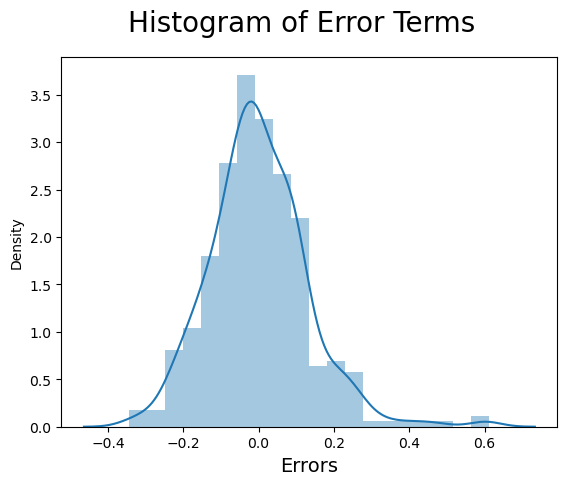

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Histogram of Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 14)    

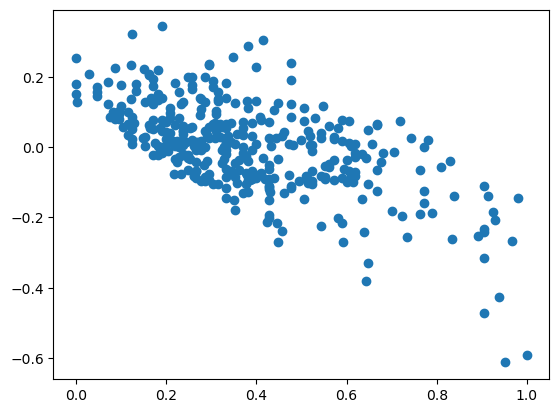

In [53]:
plt.scatter(y_train,res)
plt.show()

In [54]:
# Manually select a different set of features
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'airconditioning','hotwaterheating', 'parking', 'prefarea','furnished','semi-furnished']
# Through trial and error and analysis on the heatmap, the closer the correlation coefficient to 1 or -1 ---> better
# As the correlation coefficient of unfurnished to price is -0.28 which is far from -1 and 1, the feature is not selected

In [55]:
# Split the dataset into training and testing sets
np.random.seed(0)
df_train, df_test = train_test_split(housing[features + ['price']], train_size = 0.7, test_size = 0.3, random_state = 100)
# Going with the 70:30 approach for this dataset after trial and errors
# 70% is used for training set and 30% is used for testing set

In [56]:
# Scale the numerical variables using MinMaxScaler (unfurnished is dropped)
scaler = MinMaxScaler()
numericVars = housing.select_dtypes(np.number).drop('unfurnished', axis=1).columns.tolist()
df_train[numericVars] = scaler.fit_transform(df_train[numericVars])
df_test[numericVars] = scaler.transform(df_test[numericVars])

In [57]:
# Separate the predictor variables and the target variable for both training and testing sets
y_train = df_train.pop('price')
X_train = df_train
y_test = df_test.pop('price')
X_test = df_test

In [58]:
# Fit a linear regression model on the training data using the selected features
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict the target variable for the testing data using the fitted model
y_pred = lm.predict(X_test)

In [60]:
# Going with the Ridge regularization instead of Lassso regulariztion after trial and errors.
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to set to find the best alpha value from range of 0.001 to 10.
alpha_range = list(np.arange(0.001, 10, 0.1))


params = {'alpha': alpha_range}

# Create a GridSearchCV object with the Ridge regression model and the hyperparameters to tune
grid_search = GridSearchCV(Ridge(), param_grid=params, scoring='r2')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters is alpha value (set to 1 d.p)
alpha_value = round(grid_search.best_params_['alpha'], 1)
print("Best hyperparameters (best alpha value):", alpha_value)

# Predict the target variable for the testing data using the best fitted model found by the GridSearchCV object
y_pred = grid_search.predict(X_test)

Best hyperparameters (best alpha value): 1.7


In [61]:
# For linear regression models, common evaluation metrics include mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R2 score (R-squared).

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score 

# After getting the best alpha value, it is implemented in the Ridge regularization (which is 1.7 as stated above ^)
alpha = 1.7

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# Predict the target variable for the testing data using the fitted model
y_pred = ridge.predict(X_test)

# R-squared score for evaluation of model (set to 4 d.p)
r2 = r2_score(y_test, y_pred)
print("R2 score with Ridge regression: {:.4f}".format(r2))


R2 score with Ridge regression: 0.6617


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculating MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculating RMSE (Root Mean Square Error)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error(MAE):", round(mae, 4))
print ("Mean Squared Error(MSE):", round(mse,4))
print("Root Mean Squared Error(RMSE):", round(rmse, 4))

Mean Absolute Error(MAE): 0.0992
Mean Squared Error(MSE): 0.0184
Root Mean Squared Error(RMSE): 0.1355


Text(0, 0.5, 'Predicted value')

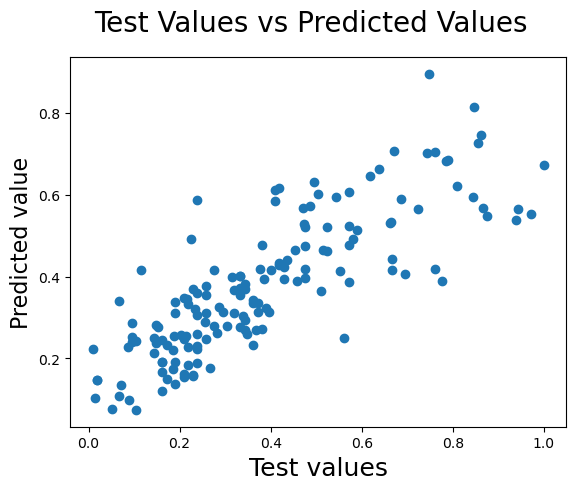

In [64]:
# Plotting test values vs predicted values
fig = plt.figure()
plt.scatter(y_test,y_pred) 
fig.suptitle('Test Values vs Predicted Values', fontsize=20)
plt.xlabel('Test values', fontsize=18)
plt.ylabel('Predicted value', fontsize=16)

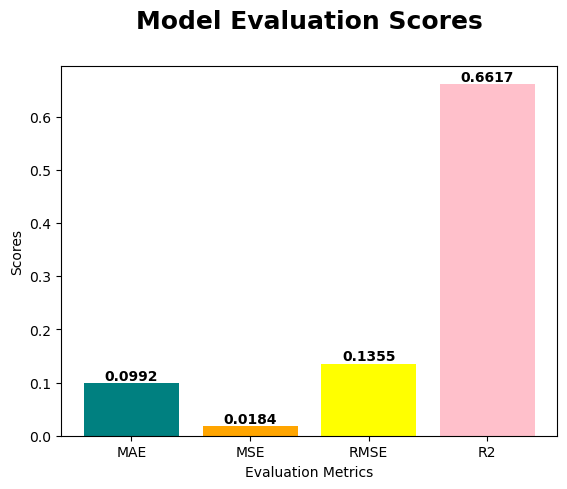

In [65]:

# Create a line chart
fig, ax = plt.subplots()
scores = [mae, mse, rmse, r2]
labels = ['MAE', 'MSE', 'RMSE', 'R2']
colors = ['teal', 'orange', 'yellow', 'pink']
ax.bar(labels, scores, color=colors)
ax.set_ylabel('Scores' ,fontsize = 10)
ax.set_xlabel('Evaluation Metrics', fontsize = 10)
ax.set_title('Model Evaluation Scores', y = 1.08, fontsize= 18, fontweight= 'bold')

# Add value labels to the top of each bar chart
for i, v in enumerate(scores):
    ax.text(i, v, str(round(v, 4)), ha='center', va='bottom', fontweight= 'bold')

plt.show()